In [1]:
# CIFAR10 Image Classification using Keras

In [2]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model, Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.noise import GaussianNoise
from keras.layers.normalization import BatchNormalization
import pandas as pd
import matplotlib.pyplot as plt
import time, pickle
from keras.utils import to_categorical
%matplotlib inline

Using TensorFlow backend.


In [3]:
#Import Data

In [4]:
nb_classes = 10
class_name = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [6]:
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'training samples')
print(X_test.shape[0], 'validation samples')

X_train shape: (50000, 32, 32, 3)
50000 training samples
10000 validation samples


In [7]:
#Normalize

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
#To Categorical

In [10]:
y_train = to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)

In [11]:
#Create Model # 1
#模型采用类似于 VGG16 的结构：
#使用固定尺寸的小卷积核 (3x3)
#以2的幂次递增的卷积核数量 (64, 128, 256)
#两层卷积搭配一层池化
#全连接层没有采用 VGG16 庞大的三层结构，避免运算量过大，仅使用 128 个节点的单个FC
#权重初始化采用He Normal

In [12]:
x = Input(shape=(32, 32, 3))
y = x
y = Convolution2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(y)
y = BatchNormalization()(y)
y = Convolution2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(y)
y = BatchNormalization()(y)
y = MaxPooling2D(pool_size=2, strides=2, padding='valid')(y)

y = Convolution2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(y)
y = BatchNormalization()(y)
y = Convolution2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(y)
y = BatchNormalization()(y)
y = MaxPooling2D(pool_size=2, strides=2, padding='valid')(y)

y = Convolution2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(y)
y = BatchNormalization()(y)
y = Convolution2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu', kernel_initializer='he_normal')(y)
y = BatchNormalization()(y)
y = MaxPooling2D(pool_size=2, strides=2, padding='valid')(y)

y = Flatten()(y)
y = Dense(units=128, activation='relu', kernel_initializer='he_normal')(y)
y = Dropout(0.5)(y)
y = Dense(units=nb_classes, activation='softmax', kernel_initializer='he_normal')(y)

# SGD (Stochastic Gradient Descent)
# lrate = 0.01
# decay = lrate / nb_epoch
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)

model1 = Model(inputs=x, outputs=y, name='model1')

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
__________

In [13]:
nb_epoch = 100
batch_size = 1024
start = time.time()
h = model1.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=nb_epoch, validation_data=(X_test, y_test), shuffle=True)
model1.save('CIFAR10_model_no_data_augmentation.h5')
print('@ Total Time Spent: %.2f seconds' % (time.time() - start))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 32s 641us/step - loss: 2.0517 - acc: 0.3178 - val_loss: 1.5036 - val_acc: 0.4702
Epoch 2/100
50000/50000 [==============================] - 26s 514us/step - loss: 1.4397 - acc: 0.4839 - val_loss: 1.2160 - val_acc: 0.5672
Epoch 3/100
50000/50000 [==============================] - 26s 514us/step - loss: 1.2129 - acc: 0.5667 - val_loss: 1.1690 - val_acc: 0.5847
Epoch 4/100
50000/50000 [==============================] - 26s 516us/step - loss: 1.0397 - acc: 0.6337 - val_loss: 1.0049 - val_acc: 0.6420
Epoch 5/100
50000/50000 [==============================] - 26s 516us/step - loss: 0.9070 - acc: 0.6806 - val_loss: 0.9024 - val_acc: 0.6847
Epoch 6/100
50000/50000 [==============================] - 26s 518us/step - loss: 0.7989 - acc: 0.7200 - val_loss: 0.8792 - val_acc: 0.6994
Epoch 7/100
50000/50000 [==============================] - 26s 516us/step - loss: 0.7147 - acc: 0.7487 - val_l

Epoch 59/100
50000/50000 [==============================] - 26s 514us/step - loss: 0.0379 - acc: 0.9879 - val_loss: 1.1458 - val_acc: 0.8089
Epoch 60/100
50000/50000 [==============================] - 26s 514us/step - loss: 0.0335 - acc: 0.9894 - val_loss: 1.2519 - val_acc: 0.8025
Epoch 61/100
50000/50000 [==============================] - 26s 514us/step - loss: 0.0321 - acc: 0.9892 - val_loss: 1.3436 - val_acc: 0.7982
Epoch 62/100
50000/50000 [==============================] - 26s 514us/step - loss: 0.0313 - acc: 0.9892 - val_loss: 1.2772 - val_acc: 0.8054
Epoch 63/100
50000/50000 [==============================] - 26s 514us/step - loss: 0.0331 - acc: 0.9896 - val_loss: 1.2956 - val_acc: 0.7986
Epoch 64/100
50000/50000 [==============================] - 26s 514us/step - loss: 0.0344 - acc: 0.9887 - val_loss: 1.2705 - val_acc: 0.8038
Epoch 65/100
50000/50000 [==============================] - 26s 514us/step - loss: 0.0353 - acc: 0.9882 - val_loss: 1.2319 - val_acc: 0.8070
Epoch 66/100


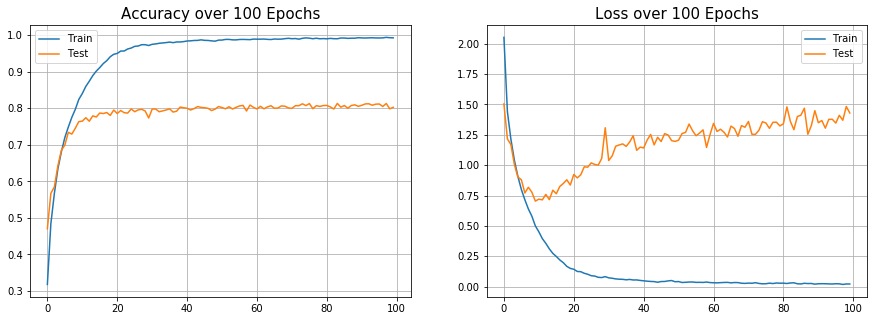

In [14]:
def plot_acc_loss(h, nb_epoch):
    acc, loss, val_acc, val_loss = h.history['acc'], h.history['loss'], h.history['val_acc'], h.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(nb_epoch), acc, label='Train')
    plt.plot(range(nb_epoch), val_acc, label='Test')
    plt.title('Accuracy over ' + str(nb_epoch) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(nb_epoch), loss, label='Train')
    plt.plot(range(nb_epoch), val_loss, label='Test')
    plt.title('Loss over ' + str(nb_epoch) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(h, nb_epoch)

In [15]:
loss, accuracy = model1.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (accuracy * 100, loss))
loss, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (accuracy * 100, loss))

Training Accuracy = 99.14 %     loss = 0.026312
Testing Accuracy = 80.27 %    loss = 1.429289


In [16]:
#Further Training with Data Augmentation

In [ ]:
aug_gen = ImageDataGenerator(
    featurewise_center = False,  # set input mean to 0 over the dataset
    samplewise_center = False,  # set each sample mean to 0
    featurewise_std_normalization = False,  # divide inputs by std of the dataset
    samplewise_std_normalization = False,  # divide each input by its std
    zca_whitening = False,  # apply ZCA whitening
    rotation_range = 0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range = 0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range = 0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip = True,  # randomly flip images
    vertical_flip = False,  # randomly flip images
)

nb_epoch = 100
aug_gen.fit(X_train)
gen = aug_gen.flow(X_train, y_train, batch_size=batch_size)
h = model1.fit_generator(generator=gen, steps_per_epoch=50000//batch_size, epochs=nb_epoch, validation_data=(X_test, y_test))
model1.save('CIFAR10_model_with_data_augmentation.h5')

Epoch 1/100
48/48 [==============================] - 25s 520ms/step - loss: 0.0429 - acc: 0.9861 - val_loss: 0.7015 - val_acc: 0.8785
Epoch 2/100
48/48 [==============================] - 25s 511ms/step - loss: 0.0396 - acc: 0.9868 - val_loss: 0.6671 - val_acc: 0.8834
Epoch 3/100
48/48 [==============================] - 25s 514ms/step - loss: 0.0416 - acc: 0.9864 - val_loss: 0.6381 - val_acc: 0.8881
Epoch 4/100
48/48 [==============================] - 25s 513ms/step - loss: 0.0415 - acc: 0.9861 - val_loss: 0.7223 - val_acc: 0.8761
Epoch 5/100
48/48 [==============================] - 25s 516ms/step - loss: 0.0414 - acc: 0.9866 - val_loss: 0.7455 - val_acc: 0.8711
Epoch 6/100
48/48 [==============================] - 25s 513ms/step - loss: 0.0394 - acc: 0.9873 - val_loss: 0.6562 - val_acc: 0.8878
Epoch 7/100
48/48 [==============================] - 25s 513ms/step - loss: 0.0386 - acc: 0.9867 - val_loss: 0.7000 - val_acc: 0.8834
Epoch 8/100
48/48 [==============================] - 25s 514ms

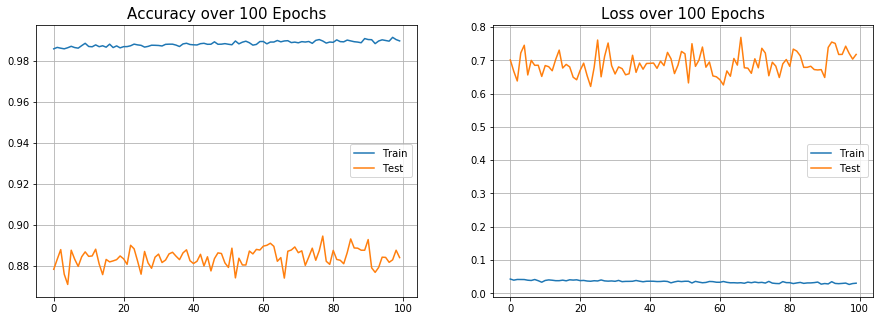

In [25]:
plot_acc_loss(h, nb_epoch)

In [26]:
#可以看到，使用数据增强后继续训练模型，可以将准确率从80%提升至87%。

In [27]:
loss, accuracy = model1.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (accuracy * 100, loss))
loss, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (accuracy * 100, loss))

Training Accuracy = 98.68 %     loss = 0.043531
Testing Accuracy = 88.42 %    loss = 0.717867
